In [1]:
# import all necessary packages
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from nltk.stem.wordnet import WordNetLemmatizer

### 1. use pandas read_csv with sep='\t' to read in the following 2 files available from the us naval academy:
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/keyword-tweets.txt'
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/general-tweets.txt'

#### The site is down and we are going to use csv files instead of urls

In [2]:
# create a dataframe with the two file instead of the urls

# define paths
gen_path = Path('../data/general-tweets.csv') 

key_path = Path('../data/keyword-tweets.csv') 

# create dataframes for general tweets and keyword tweets
gen_tweets_df = pd.read_csv(gen_path)

key_tweets_df = pd.read_csv(key_path)

# show head of both dfs
display(gen_tweets_df.head())
display(key_tweets_df.head())

URLError: <urlopen error no host given>

### 2. concatenate these 2 data sets into a single data frame called LabeledTweets that has 2 columns, named Sentiment and Tweet <span style="color:red" float:right>

In [ ]:
# create column names 
col_names = 'Sentiment', 'Tweet'

# concatenate dfs on rows
sentiment_tweet_df = pd.concat([gen_tweets_df, key_tweets_df], axis=0)

# rename columns
sentiment_tweet_df.columns = col_names

# review dataframe
sentiment_tweet_df

**We are concatenating on the rows axis and not the columns axis**

### 3. replace sentiment labels 'POLIT': 1, 'NOT': 0; <span style="color:red" float:right>

In [ ]:
# replace labels with 1 or 0
sentiment_tweet_df.replace('NOT', 0, inplace=True)
sentiment_tweet_df.replace('POLIT', 1, inplace=True)

# review dataframe
display(sentiment_tweet_df)

# create copy for testing
sentiment_copy = sentiment_tweet_df.copy()

**Replacing the sentiment values into computer interpretable values was simple with the .replace method**

In [ ]:
# check dtypes
sentiment_copy.dtypes

### 4. clean the tweets
   1. remove all tokens that contain a "@". Remove the whole token, not just the character.
   2. remove all tokens that contain "http". Remove the whole token, not just the characters.
   3. **replace** (not remove) all punctuation marks with a space (" ")
   4. **replace** all numbers with a space
   5. **replace** all non ascii characters with a space
   7. convert all characters to lowercase
   8. strip extra whitespaces
   9. lemmatize tokens
   9. No need to remove stopwords because TfidfVectorizer will take care of that
<br/><span style="color:red" float:right>[9 point]</span>


In [ ]:
def clean(text, list_of_steps):
    
    for step in list_of_steps:
        # step 1 remove entire tokens starting with ampersand
        if step == 'remove_amp':
            text = ' '.join([x for x in text.split() if not x.startswith("@")])
        # step 2 remove entire tokens starting with http    
        elif step == 'remove_http':
            text = ' '.join([x for x in text.split() if not x.startswith("http")])
        # step 3 replace punctuation with space     
        elif step == 'replace_punctuation':
            punct_exclude = set(string.punctuation)
            for char in text:
                if char in punct_exclude:
                    text = text.replace(char, ' ')
        # step 4 replace numbers    
        elif step == 'replace_numbers':
            for char in text:
                try:
                    if char.isdigit():
                        text = text.replace(char, ' ')
                except:
                    pass
        # step 5 replace non ascii characters with space    
        elif step == 'replace_non_ascii':
            for char in text:
                if ord(char) >= 128:
                    text = text.replace(char, ' ')
        # step 6 turn all text to lowercase    
        elif step == 'lower_case':
            text = text.lower()
        # step 7 strip the white space    
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
        # step 8 lemmatizze the words into their stems    
        elif step == 'lemmatize':
            lmtzr = WordNetLemmatizer()
            word_list = text.split(' ')
            stemmed_words = [lmtzr.lemmatize(word) for word in word_list]
            text = ' '.join(stemmed_words)
    # finally return the processed text        
    return text

# Outline the steps
step_list = ['remove_amp', 'remove_http', 'replace_punctuation', 'replace_numbers',
            'replace_non_ascii', 'lower_case', 'strip_whitespace', 'lemmatize']

**While the instructions say to replace punctuation, numbers and non ascii characters with a space, when putting ' '.join(...) instead of ''.join(... I continued to get nonsense strings that would eventually error out as they were all stop words when trying to vectorize. However, with a try and except block I was able to meet the requirement that asks for replacing the characters with a space instead of just taking out the character completely.**

In [ ]:
# create a test string
test_string = "@kajhds // ci **87 http//iciidnnwh asdkk't skkxi &dkic k,idi to for by  éè    UIOPHHGVG" 

**I created a test string to try out the steps prior to applying the function to the entire dataframe**

In [8]:
# test on test string
clean_text = clean(test_string, step_list)
clean_text

'ci asdkk t skkxi dkic k idi to for by uiophhgvg'

**It looks like the cleaning worked on the test string created above so I will go ahead and use it on the entire df. I wanted to test out one line of text to make troubleshooting simpler. I also had tried to go about this function in a different, unique way as opposed to recycling the one from class. I managed to get it to wok on the single text line, but when applied to entire dataframe, Series errors and others kept occurring and so I decided to just re-use the one from the professors code with a few minor changes to meet the requirements.**

In [9]:
# apply the function on df by using the map function linked with the lambda function
sentiment_copy['clean_tweet'] = sentiment_copy['Tweet'].map(lambda s: clean(s, step_list))

# review dataframe
sentiment_copy

,Sentiment,Tweet,clean_tweet
0,0,Bumping dj sefs mixtape nowww this is my music...,bumping dj sefs mixtape nowww this is my music...
1,0,#ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...,ieroween the story of ieroween the video just ...
2,0,trick or treating at the mall today; ZOO! last...,trick or treating at the mall today zoo last y...
3,0,@Ussk81 PMSL!!! I try not to stare but I can't...,pmsl i try not to stare but i can t help it li...
4,0,@Sc0rpi0n676 btw - is there a remote chance i ...,btw is there a remote chance i will see you later
...,...,...,...
1999,1,"My fav part = ""government says"" RT @cnnbrk: Ir...",my fav part government say rt iranian presiden...
2000,1,@arditord bro do you know? I got an urgent inf...,bro do you know i got an urgent info from our ...
2001,1,@senjohnmccain Are you for or against a govern...,are you for or against a government run plan w...
2002,1,"Rachel Maddow & The Republican ""Obama Birther ...",rachel maddow the republican obama birther caucus


**Using the map(lambda s:...) method was a trick I had not known previously. This is a tool I plan on reusing in the future as before I had only known the .apply() method. Using the .apply() method with a previous version on the clean function was drawing errors as I was performing actions on the entire series as opposed to the individual string rows themselves.**

**The regular tweets can be seen correctly transformed into their cleaned version in the 3rd column of our dataframe. All of the punctuation, twitter usernames and http links have been removed. Everything is in lowercase and the white spaces have been clipped. I wonder if there is another way further stem the values as I can see the word 'nowww' in the first row hasn't been changed to simply a 'now' stem. Further, the word H.S. turned into h and the word us turned into u. This u could be interpretted as us or you depending on how someone is tweeting. Dealing with this could improve our predictive capabilities**

In [10]:
sentiment_copy.dtypes

Sentiment       int64
Tweet          object
clean_tweet    object
dtype: object

**Double checking the object type**

### 5. Use TfidfVectorizer from sklearn to prepare the data for machine learning.  Use max_features = 50;  <span style="color:red" float:right>

In [11]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = sentiment_copy['clean_tweet']

# create a tfidVectorizer instance
vectorizer = TfidfVectorizer(max_features = 50)

# fit and transform our clean texts to a matrix
tfidf_matrix =  vectorizer.fit_transform(clean_texts)

# extract the column names
feature_names = vectorizer.get_feature_names_out()

# change the original matrix to a dense array
tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,about,afghanistan,all,and,are,at,be,but,by,can,...,time,to,up,wa,we,what,will,with,you,your
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.347524,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.768417,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.440014,0.0,0.458611,...,0.0,0.24137,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.714283,0.000000,0.488726,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.390681,0.000000,0.0
4000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.337813,0.0
4001,0.0,0.0,0.0,0.0,0.331115,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.368618,0.356051,0.370403,0.000000,0.253437,0.0
4002,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


**We still have all of our rows from before fitting indicating the data has been preserved. The words have all been turned into their term frequency inverse document frequency values making their values of importance and usable in a predictive model.**

### 6. Use sklearn LogisticRegression to train a model on the  results on 75% of the data. <span style="color:red" float:right>[1 point]</span>

### 7. determine the accuracy on the training data and the test data.   Determine the baseline accuracy. <span style="color:red" float:right>[1 point]</span>

### 8. Repeat steps 5, 6, and 7  with TfidfVectorizer max_features set to 5, 500, 5000, 50000 and discuss your accuracies. <span style="color:red" float:right>[2 point]</span>

In [12]:
# create targets, features are the tfidf_df
y_targets = sentiment_copy['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

**The TF-IDF dataframe already has the engineered features we need so all that I need to do is grab the sentiment values as our targets**

In [13]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 50)


**We can see that of the 4004 rows, the training data contains 3003 which is 75%**

In [14]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [15]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.7888777888777889
Test accuracy: 0.8091908091908092
Baseline accuracy: 0.5934065934065934


**This first model with a max_feature parameter set to 50 garners a fairly decent predictive model. The test accuracy is at ~81% which tells us it is not overfitting the data, but is still giving us a high degree of accuracy.**

In [16]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       594
           1       0.81      0.69      0.75       407

    accuracy                           0.81      1001
   macro avg       0.81      0.79      0.80      1001
weighted avg       0.81      0.81      0.81      1001



**With the max features set to 50 we are able to get a semi-good predictive ability for our algorithm with the accuracy being ~%78. It seems that having 50 features does a decent job of giving enough information for predicting sentiment.**

In [17]:
# create a running list of dictionaries to hold the feature size and accuracy
accuracy_dict = [{'feature_size': 50, 'accuracy': test_acc.round(3)}]
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.809}]

### Re do with max features set to 5

In [18]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = sentiment_copy['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 5)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,and,of,rt,the,to
0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.572551,0.000000,0.819869,0.0
2,0.0,0.000000,0.000000,1.000000,0.0
3,0.0,0.000000,0.000000,0.000000,1.0
4,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...
3999,0.0,0.742665,0.669663,0.000000,0.0
4000,0.0,0.000000,0.000000,0.000000,0.0
4001,0.0,0.000000,0.000000,0.000000,0.0
4002,0.0,0.000000,0.000000,1.000000,0.0


**This dataframe looks entirely too simple to be of use to our sentiment prediction as the words presented are almost all conjunctions or prepositions**

In [19]:
# create targets, features are the tfidf_df
y_targets = sentiment_copy['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [20]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 5)


In [21]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [22]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.6117216117216118
Test accuracy: 0.6103896103896104
Baseline accuracy: 0.5934065934065934


**With only 5 features we have more or less a useless model that is correct around 60% of the time. This is performance is horrendous.**

In [23]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       594
           1       0.52      0.53      0.53       407

    accuracy                           0.61      1001
   macro avg       0.60      0.60      0.60      1001
weighted avg       0.61      0.61      0.61      1001



In [24]:
# continue to add to our running list of dictionaries
accuracy_dict.append({'feature_size': 5, 'accuracy': test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.809},
 {'feature_size': 5, 'accuracy': 0.61}]

### Re do with max features set to 500

In [25]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = sentiment_copy['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 500)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,about,act,action,actually,afghanistan,after,again,against,all,already,...,www,ya,yeah,year,yes,yet,yo,york,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.532491,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.321852,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.154331,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357807,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.174837,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


**This data frame appears to be the most reasonable as the words displayed seem relevent, yet the number of features is deep enough to add value to our predictions**

In [26]:
# create targets, features are the tfidf_df
y_targets = sentiment_copy['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [27]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 500)


In [28]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [29]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.9054279054279054
Test accuracy: 0.8861138861138861
Baseline accuracy: 0.5934065934065934


**500 features is giving us an even higher accuracy than the 50 feature max. I believe we are approaching the overfitting realm, but not in it yet.**

In [30]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       594
           1       0.88      0.83      0.86       407

    accuracy                           0.89      1001
   macro avg       0.89      0.88      0.88      1001
weighted avg       0.89      0.89      0.89      1001



In [31]:
accuracy_dict.append({'feature_size': 500, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.809},
 {'feature_size': 5, 'accuracy': 0.61},
 {'feature_size': 500, 'accuracy': 0.886}]

### Re do with max features set to 5000

In [32]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = sentiment_copy['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,aaaaaaaaaaaaaaaaaaaaaah,aaaah,aan,aarp,ab,able,abortion,about,above,abroad,...,youth,youtube,yr,yu,zero,zijn,zippity,zombie,zoo,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.301,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [33]:
# create targets, features are the tfidf_df
y_targets = sentiment_copy['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [34]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 5000)


In [35]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [36]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.939060939060939
Test accuracy: 0.8971028971028971
Baseline accuracy: 0.5934065934065934


**The test accuracy did not improve very much from the 500 feature max to the 5000 feature max. Both were in the high 80% range.**

In [37]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       594
           1       0.90      0.84      0.87       407

    accuracy                           0.90      1001
   macro avg       0.90      0.89      0.89      1001
weighted avg       0.90      0.90      0.90      1001



In [38]:
accuracy_dict.append({'feature_size': 5000, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.809},
 {'feature_size': 5, 'accuracy': 0.61},
 {'feature_size': 500, 'accuracy': 0.886},
 {'feature_size': 5000, 'accuracy': 0.897}]

### Re do with max features set to 50000

In [39]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = sentiment_copy['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 50000)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,aaaaaaaaaaaaaaaaaaaaaah,aaaaaahhhhhhh,aaaah,aagghh,aahh,aan,aanslag,aaron,aarp,ab,...,zombified,zona,zone,zoning,zoo,zorgen,zou,zshare,zu,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.301,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0


In [40]:
# create targets, features are the tfidf_df
y_targets = sentiment_copy['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [41]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 10549)


In [42]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [43]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.9473859473859474
Test accuracy: 0.8951048951048951
Baseline accuracy: 0.5934065934065934


**Performance seems to taper off at this point where the max features are set to 50000. However, the training accuracy is overfitting the data at this point. We may want to use a lower feature max for our predictive model.**

**With such a high number of features we start to enter the realm of overfitting with accuracies getting into the 90%. **

In [44]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       594
           1       0.90      0.83      0.87       407

    accuracy                           0.90      1001
   macro avg       0.90      0.89      0.89      1001
weighted avg       0.90      0.90      0.89      1001



In [45]:
# append new values to dictionary
accuracy_dict.append({'feature_size': 50000, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.809},
 {'feature_size': 5, 'accuracy': 0.61},
 {'feature_size': 500, 'accuracy': 0.886},
 {'feature_size': 5000, 'accuracy': 0.897},
 {'feature_size': 50000, 'accuracy': 0.895}]

In [49]:
# create dataframe of accuracy and feature size
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df = accuracy_df.set_index('feature_size')
accuracy_df.columns = ['TestAccuracy']

# display df
accuracy_df = accuracy_df.sort_index(ascending=True)

accuracy_df

,TestAccuracy
feature_size,
5,0.610
50,0.809
500,0.886
5000,0.897
50000,0.895


<AxesSubplot:title={'center':'Test Accuracy vs Feature Size'}, xlabel='Log(Feature Size)', ylabel='Percentage (%)'>

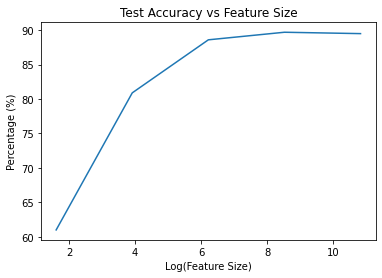

In [59]:
# Plot on a graph, but take the log of the feature size and convert TestAccuracy to percent
x = np.log(list(accuracy_df.index))
y = np.array(accuracy_df['TestAccuracy'])*100

plt.axes(title='Test Accuracy vs Feature Size', xlabel='Log(Feature Size)', ylabel='Percentage (%)')
sns.lineplot(x=x, y=y)

**Here we can see the trend in accuracy as the feature size increases. Predictive test accuracy increases with feature size, almost exponentially. But after a certain point the accuracy flattens out and even drops a little.**